# Olist E-Commerce Sales Analysis

## Objectives
1. What is the average number of orders placed each month, and how does the monthly order trend vary over time?
2. What is the total revenue generated over time, and how does it vary by quarter?
3. Which product categories contribute the most to overall sales revenue?
4. Which cities generate the highest number of orders?

## Import Libraries

In [2]:
# import libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# connect with database
conn = sqlite3.connect("olist.db") 

## Load Data

In [4]:
# list tables
table = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
table

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


## Exploratory Data Analysis

### 1. Customer

In [5]:
# olist_order_customer_dataset
query = """
SELECT * FROM olist_order_customer_dataset;
"""
customer = pd.read_sql(query, conn)
customer

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
# remove rows with missing values
customer.dropna(axis=0, how='any', inplace=True)

In [7]:
# checking missing values
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


In [8]:
# checking duplicates
customer.duplicated().sum()

0

### 2. Order

In [9]:
# olist_order_dataset
query = """
SELECT * FROM olist_order_dataset;
"""
order = pd.read_sql(query, conn)
order

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
# remove rows with missing values
order.dropna(axis=0, how='any', inplace=True)

In [11]:
# checking missing values
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          96461 non-null  int64 
 1   order_id                       96461 non-null  object
 2   customer_id                    96461 non-null  object
 3   order_status                   96461 non-null  object
 4   order_purchase_timestamp       96461 non-null  object
 5   order_approved_at              96461 non-null  object
 6   order_delivered_carrier_date   96461 non-null  object
 7   order_delivered_customer_date  96461 non-null  object
 8   order_estimated_delivery_date  96461 non-null  object
dtypes: int64(1), object(8)
memory usage: 7.4+ MB


In [12]:
# checking duplicates
order.duplicated().sum()

0

### 3. Reviews

In [13]:
# olist_order_reviews_dataset
query = """
SELECT * FROM olist_order_reviews_dataset;
"""
reviews = pd.read_sql(query, conn)
reviews

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...,...
99219,99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [14]:
# remove rows with missing values
reviews.dropna(axis=0, how='any', inplace=True)

In [15]:
# checking missing values
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9839 entries, 9 to 99200
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    9839 non-null   int64 
 1   review_id                9839 non-null   object
 2   order_id                 9839 non-null   object
 3   review_score             9839 non-null   int64 
 4   review_comment_title     9839 non-null   object
 5   review_comment_message   9839 non-null   object
 6   review_creation_date     9839 non-null   object
 7   review_answer_timestamp  9839 non-null   object
dtypes: int64(2), object(6)
memory usage: 691.8+ KB


In [16]:
# checking duplicates
reviews.duplicated().sum()

0

### 4. Payments

In [17]:
# olist_order_payments_dataset
query = """
SELECT * FROM olist_order_payments_dataset;
"""
payments = pd.read_sql(query, conn)
payments

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [18]:
# checking missing values
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [19]:
# checking duplicates
payments.duplicated().sum()

0

### 5. Items

In [20]:
# olist_order_items_dataset
query = """
SELECT * FROM olist_order_items_dataset;
"""
items = pd.read_sql(query, conn)
items

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [21]:
# checking missing values
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [22]:
# checking duplicates
items.duplicated().sum()

0

### 6. Products

In [23]:
# olist_products_dataset
query = """
SELECT * FROM olist_products_dataset;
"""
products = pd.read_sql(query, conn)
products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [24]:
# remove rows with missing values
products.dropna(axis=0, how='any', inplace=True)

In [25]:
# checking missing values
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32340 non-null  int64  
 1   product_id                  32340 non-null  object 
 2   product_category_name       32340 non-null  object 
 3   product_name_lenght         32340 non-null  float64
 4   product_description_lenght  32340 non-null  float64
 5   product_photos_qty          32340 non-null  float64
 6   product_weight_g            32340 non-null  float64
 7   product_length_cm           32340 non-null  float64
 8   product_height_cm           32340 non-null  float64
 9   product_width_cm            32340 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.7+ MB


In [26]:

products.duplicated().sum()

0

### 7. Sellers

In [27]:
# olist_sellers_dataset
query = """
SELECT * FROM olist_sellers_dataset;
"""
sellers = pd.read_sql(query, conn)
sellers

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [28]:
# checking missing values
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   3095 non-null   int64 
 1   seller_id               3095 non-null   object
 2   seller_zip_code_prefix  3095 non-null   int64 
 3   seller_city             3095 non-null   object
 4   seller_state            3095 non-null   object
dtypes: int64(2), object(3)
memory usage: 121.0+ KB


In [29]:
# checking duplicates
sellers.duplicated().sum()

0

### 8. Geolocation

In [30]:
# olist_geolocation_dataset
query = """
SELECT * FROM olist_geolocation_dataset;
"""
geolocation = pd.read_sql(query, conn)
geolocation

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...
1000158,1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [31]:
# checking missing values
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   index                        1000163 non-null  int64  
 1   geolocation_zip_code_prefix  1000163 non-null  int64  
 2   geolocation_lat              1000163 non-null  float64
 3   geolocation_lng              1000163 non-null  float64
 4   geolocation_city             1000163 non-null  object 
 5   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 45.8+ MB


In [32]:
#checking duplicates
geolocation.duplicated().sum()

0

### 9. Translation 

In [33]:
# product_category_name_translation
query = """
SELECT * FROM product_category_name_translation;
"""
translation = pd.read_sql(query, conn)
translation

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [34]:
# checking missing values
translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          71 non-null     int64 
 1   product_category_name          71 non-null     object
 2   product_category_name_english  71 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [35]:
# checking duplicates
translation.duplicated().sum()

0

## Answering Business Questions

### 1. What is the average number of orders placed each month, and how does the monthly order trend vary over time?

#### Selecting Data

In [36]:
# removing rows with canceled and unavailable order status
order.drop(order[order['order_status'].isin(['canceled', 'unavailable'])].index, axis=0, inplace=True)

# select necessary columns
total_order = order[['order_id', 'order_status','order_purchase_timestamp']]

# convert timestamp into date
total_order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])

# show table
total_order

,order_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27


#### Processing Data

In [37]:
# create a copy and set order_purchase_timestamp as the index
month_total_order = total_order.copy()
month_total_order.set_index('order_purchase_timestamp', inplace=True)

# group by month and find the total orders for each month
month_total_order = month_total_order.resample('M', closed='right').agg({'order_id': 'count'})

# show the result
print(month_total_order)

                          order_id
order_purchase_timestamp          
2016-09-30                       1
2016-10-31                     265
2016-11-30                       0
2016-12-31                       1
2017-01-31                     748
2017-02-28                    1641
2017-03-31                    2546
2017-04-30                    2303
2017-05-31                    3545
2017-06-30                    3135
2017-07-31                    3872
2017-08-31                    4193
2017-09-30                    4149
2017-10-31                    4478
2017-11-30                    7288
2017-12-31                    5513
2018-01-31                    7069
2018-02-28                    6555
2018-03-31                    7003
2018-04-30                    6798
2018-05-31                    6749
2018-06-30                    6096
2018-07-31                    6156
2018-08-31                    6351


In [38]:
# calculating total revenue
total = round((month_total_order['order_id'].sum())/len(month_total_order))
print(f'Average number of orders placed in Olist is {total} orders every month')

Average number of orders placed in Olist is 4019 orders every month


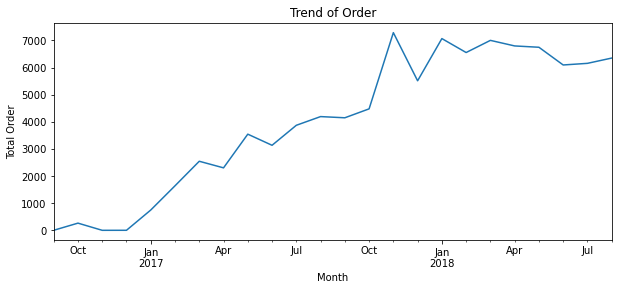

In [39]:
# Create a line plot to show the trend of order
fig,ax = plt.subplots(figsize = (10,4))
month_total_order.plot(ax = ax, legend = False)

plt.xlabel('Month')
plt.ylabel('Total Order')
plt.title("Trend of Order")
plt.show()

### 2. What is the total revenue generated over time, and how does it vary by quarter?

#### Selecting Data

In [40]:
# combine total order and payments tables
order_payments = pd.merge(total_order, payments, on='order_id', how='left')

# select necessary columns
order_revenue= order_payments[['order_id','order_purchase_timestamp','payment_value']]
order_revenue

,order_id,order_purchase_timestamp,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12
...,...,...,...
100729,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,85.08
100730,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,195.00
100731,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,271.01
100732,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,441.16


In [41]:
# create a copy and set order_purchase_timestamp as the index
month_total_revenue = order_revenue.copy()
month_total_revenue.set_index('order_purchase_timestamp', inplace=True)

# group by month and find the total orders for each month
quarter_total_revenue = month_total_revenue.resample('Q', closed='right').agg({'payment_value': 'sum'})

# Show result
quarter_total_revenue

,payment_value
order_purchase_timestamp,
2016-09-30,0.00
2016-12-31,46586.33
2017-03-31,811259.11
2017-06-30,1448050.51
2017-09-30,1913380.55
2017-12-31,2747732.66
2018-03-31,3165795.74
2018-06-30,3273331.99
2018-09-30,2012797.38


In [42]:
# calculating total revenue
total_revenue = quarter_total_revenue['payment_value'].sum()
total_revenue_million = round(total_revenue/1000000,2)

print(f'The total revenue generated by Olist is R$ {total_revenue_million} Million')

The total revenue generated by Olist is R$ 15.42 Million


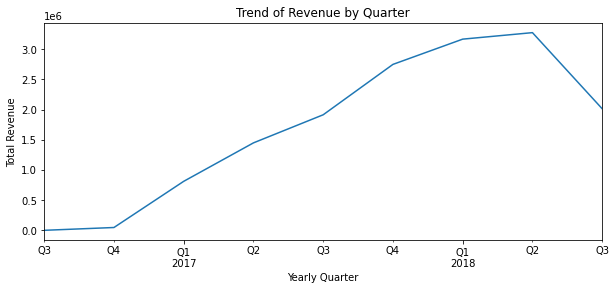

In [43]:
# create a line plot to show the trend of revenue overtime
fig,ax = plt.subplots(figsize = (10,4))
quarter_total_revenue.plot(ax = ax, legend = False)

plt.xlabel('Yearly Quarter')
plt.ylabel('Total Revenue')
plt.title("Trend of Revenue by Quarter")
plt.show()

### 3. Which product categories contribute the most to overall sales revenue?

#### Selecting Data

In [44]:
# combine order_payment, items, products, and translation tables
order_items = pd.merge(order_payments, items, on='order_id', how='left')
categories_order = pd.merge(order_items, products, on='product_id', how='left')
total_categories = pd.merge(categories_order, translation, on='product_category_name', how='left')

# select necessary columns
total_categories = total_categories[['order_id','product_category_name_english','payment_value']]

# show table
total_categories

,order_id,product_category_name_english,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,housewares,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,housewares,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,perfumery,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,auto,179.12
...,...,...,...
115009,63943bddc261676b46f01ca7ac2f7bd8,baby,195.00
115010,83c1379a015df1e13d02aae0204711ab,home_appliances_2,271.01
115011,11c177c8e97725db2631073c19f07b62,computers_accessories,441.16
115012,11c177c8e97725db2631073c19f07b62,computers_accessories,441.16


#### Data Processing

In [45]:
# calculating total revenue of each categories
most_category = total_categories.groupby('product_category_name_english')['payment_value'].sum()
most_category = most_category.sort_values(ascending=False)

# select top 10 categories
top_categories = most_category.head(10)
top_categories

product_category_name_english
bed_bath_table           1692557.09
health_beauty            1620684.04
computers_accessories    1549252.47
furniture_decor          1393972.04
watches_gifts            1387046.31
sports_leisure           1349158.47
housewares               1069787.97
auto                      833610.84
garden_tools              810460.70
cool_stuff                744339.94
Name: payment_value, dtype: float64

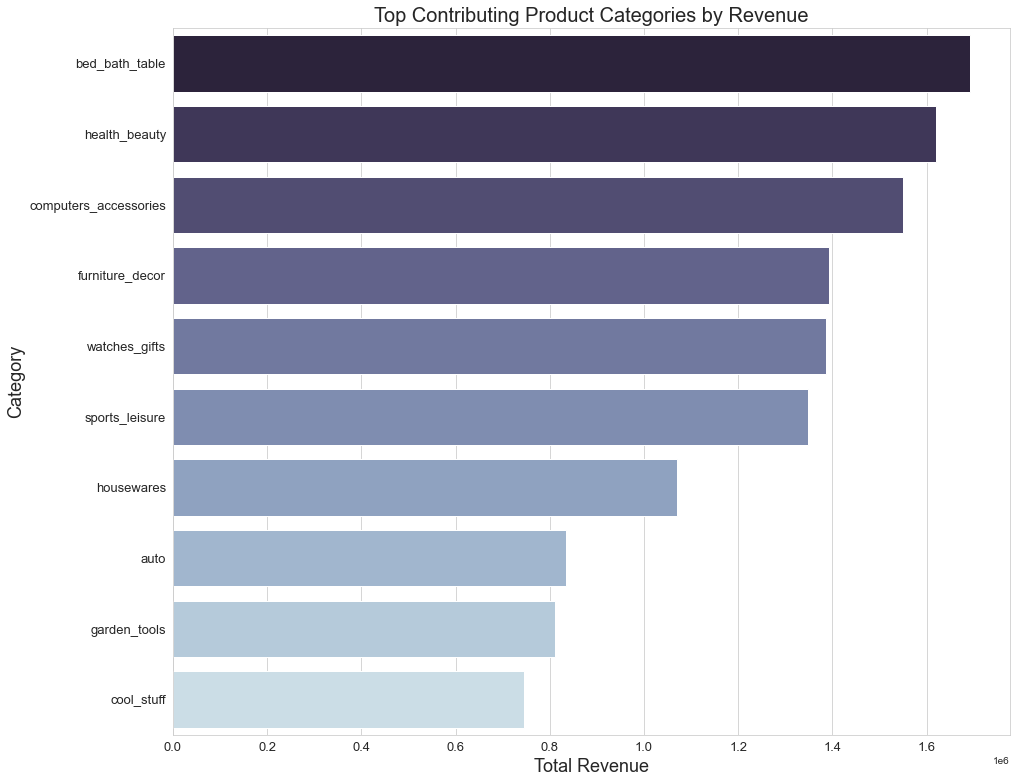

In [78]:
# bar chart of top contributing categories
plt.figure(figsize=(15, 13))
palette = sns.color_palette("ch:s=.25,rot=-.25", n_colors=len(top_categories))[::-1]
sns.barplot(x=top_categories.values, y=top_categories.index, palette=palette)
sns.set_style("whitegrid")
plt.title('Top Contributing Product Categories by Revenue', fontsize=20)
plt.xlabel('Total Revenue', fontsize=18)
plt.ylabel('Category', fontsize=18)
plt.tick_params(axis='both', labelsize=13)

plt.show()

### 4. Which cities generate the highest number of orders?

In [47]:
# combine geolocation, customer, and total_order tables
geolocation_customer = pd.merge(geolocation,customer, left_on='geolocation_zip_code_prefix', right_on='customer_zip_code_prefix')
order_geolocation = pd.merge(geolocation_customer, order, on='customer_id', how='left')

total_geolocation = order_geolocation[['order_id','geolocation_zip_code_prefix','geolocation_lat','geolocation_lng','customer_city']]
total_geolocation

,order_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,customer_city
0,e260cc3baa8f4aae3fab201ef60e1127,1037,-23.545621,-46.639292,sao paulo
1,14c7dfb8e61a3df193f153c72a99a3e5,1037,-23.545621,-46.639292,sao paulo
2,d4daa9ee1fe28458773297759dbfe2bc,1037,-23.545621,-46.639292,sao paulo
3,e260cc3baa8f4aae3fab201ef60e1127,1037,-23.545187,-46.637855,sao paulo
4,14c7dfb8e61a3df193f153c72a99a3e5,1037,-23.545187,-46.637855,sao paulo
...,...,...,...,...,...
15083450,6a6aab31a11f630e4907ec3bb0ac8958,99920,-27.854276,-52.303888,erebango
15083451,6a6aab31a11f630e4907ec3bb0ac8958,99920,-27.855364,-52.300600,erebango
15083452,6a6aab31a11f630e4907ec3bb0ac8958,99920,-27.855855,-52.300139,erebango
15083453,6a6aab31a11f630e4907ec3bb0ac8958,99920,-27.854000,-52.298330,erebango


In [81]:
# create a copy of the data
most_geolocation = total_geolocation.copy()

# Group by cities and count the total orders
most_geolocation = most_geolocation.groupby('customer_city').agg({'order_id': 'count'})

# Sort cities by total orders in descending order
most_geolocation = most_geolocation.sort_values(by='order_id', ascending=False)

# Select the top 10 cities
top_cities = most_geolocation.head(10)
top_cities

,order_id
customer_city,
rio de janeiro,1842566
sao paulo,1329798
belo horizonte,719776
niteroi,437957
curitiba,250851
santos,234733
porto alegre,223485
uberlandia,187879
campinas,166474


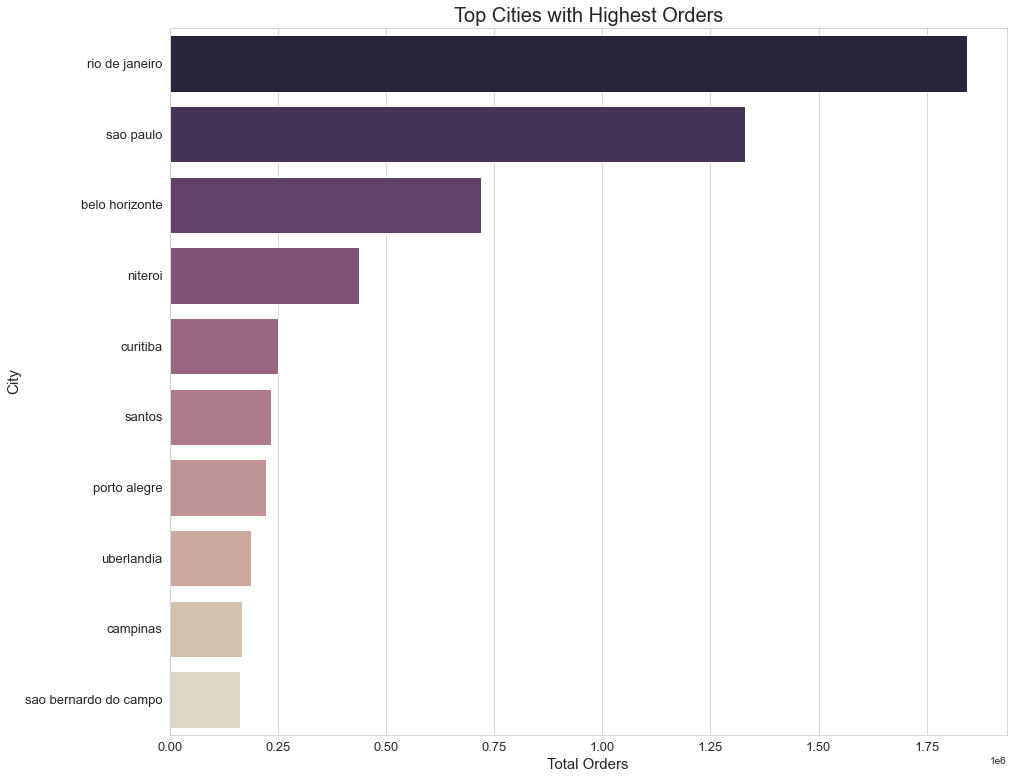

In [84]:
# Reset the index for plotting
top_cities.reset_index(inplace=True)

# Bar chart of top order cities
plt.figure(figsize=(15, 13))
palette = sns.color_palette("ch:s=-.2,r=.6", n_colors=len(top_cities))[::-1]

sns.barplot(x=top_cities['order_id'], y=top_cities['customer_city'], palette=palette)
sns.set_style("whitegrid")

# Customize title and labels
plt.title('Top Cities with Highest Orders', fontsize=20)
plt.xlabel('Total Orders', fontsize=15)
plt.ylabel('City', fontsize=15)
plt.tick_params(axis='both', labelsize=13)

plt.show()